In [83]:
from scipy.io import readsav
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from numpy.polynomial.polynomial import polyval
from pyuvdata import UVData

In [84]:
cmap1 = plt.get_cmap('inferno')
indices = np.linspace(0, cmap1.N, 6)
my_colors1 = [cmap1(int(i)) for i in indices]
cmap2 = plt.get_cmap('viridis')
indices = np.linspace(0, cmap2.N, 6)
my_colors2 = [cmap2(int(i)) for i in indices]

In [85]:
cal_file="/Users/pstar/EORanalysis/mwax_fhd/final_run/fhd_mwax_2021_limit_cal/calibration/1321445464_cal.sav"

In [86]:
vis_file = "/Users/pstar/EORanalysis/mwax_uvfits/2021_final/ssins_phased_gains_bandpass_2.0sec_40kHz_flagzero/1321445464_autos.uvfits"

In [87]:
obs_file="/Users/pstar/EORanalysis/mwax_fhd/final_run/fhd_mwax_2021_limit_cal/metadata/1321445464_obs.sav"

In [88]:
bandpass_file = "/Users/pstar/EORanalysis/mwax_fhd/final_run/fhd_mwax_2021_limit_cal/calibration/1321445464_bandpass.txt"

In [89]:
#parse bandpass file:
xx_bp = []
yy_bp = []
bp = np.empty((768, 2), np.float64)
with open(bandpass_file, 'r') as f:
    lines = []
    for line in f:
        row = line.split()
        xx_bp.append(float(row[1]))
        yy_bp.append(float(row[2]))
bp[:, 0] = xx_bp
bp[:, 1] = yy_bp

In [90]:
uv1 = UVData()
uv1.read(vis_file)

In [91]:
uv1.instrument

'128T'

In [92]:
uv1.telescope_name

'MWA'

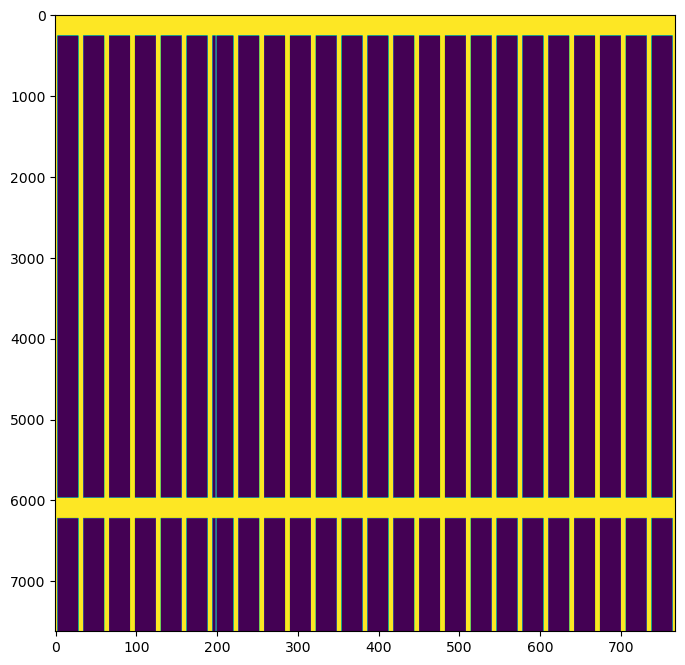

In [93]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(uv1.flag_array[:, 0, :, 0], aspect='auto')
plt.show()
plt.close()

In [94]:
# average in time
uv2 = uv1.copy()
uv2.downsample_in_time(n_times_to_avg=60)

In [95]:
test = np.mean(np.abs(uv1.data_array).reshape(uv1.Ntimes, uv1.Nbls, uv1.Nfreqs, uv1.Npols),axis=0)

In [96]:
test_sqrt = np.sqrt(test)

In [97]:
test_ratio = np.sqrt(test / test[1])

In [98]:
print(np.abs(uv2.data_array[0:10, 0, 5, 0]))

[4.91521023e+04 3.26801868e+04 5.74070265e+04 5.42961407e+04
 1.00706861e-03 4.63980379e+04 5.15009199e+04 5.03695422e+04
 4.30373756e+04 4.21208078e+04]


In [99]:
test[0:10, 5, 0]

array([4.91625386e+04, 3.26871487e+04, 5.74093316e+04, 5.43020634e+04,
       9.39930707e-04, 4.64007245e+04, 5.15121426e+04, 5.03605916e+04,
       4.30410909e+04, 4.21272903e+04])

In [100]:
cal = readsav(cal_file)

In [101]:
obs = readsav(obs_file)

In [102]:
cal.keys()

dict_keys(['cal'])

In [103]:
obs.keys()

dict_keys(['obs'])

In [104]:
# this is a record array; look at the fields
cal.cal.dtype.names

('N_POL',
 'N_FREQ',
 'N_TILE',
 'N_TIME',
 'UU',
 'VV',
 'AUTO_INITIALIZE',
 'MAX_ITER',
 'PHASE_ITER',
 'TILE_A',
 'TILE_B',
 'TILE_NAMES',
 'BIN_OFFSET',
 'FREQ',
 'GAIN',
 'ADAPTIVE_GAIN',
 'BASE_GAIN',
 'GAIN_RESIDUAL',
 'AUTO_SCALE',
 'AUTO_PARAMS',
 'CROSS_PHASE',
 'STOKES_MIX_PHASE',
 'MIN_CAL_BASELINE',
 'MAX_CAL_BASELINE',
 'N_VIS_CAL',
 'TIME_AVG',
 'MIN_SOLNS',
 'REF_ANTENNA',
 'REF_ANTENNA_NAME',
 'CONV_THRESH',
 'CONVERGENCE',
 'N_CONVERGED',
 'CONV_ITER',
 'POLYFIT',
 'AMP_DEGREE',
 'PHASE_DEGREE',
 'AMP_PARAMS',
 'PHASE_PARAMS',
 'MEAN_GAIN',
 'MEAN_GAIN_RESIDUAL',
 'MEAN_GAIN_RESTRICT',
 'STDDEV_GAIN_RESIDUAL',
 'BANDPASS',
 'MODE_FIT',
 'MODE_PARAMS',
 'CAL_ORIGIN',
 'SKYMODEL')

In [105]:
obs.obs.dtype.names

('CODE_VERSION',
 'INSTRUMENT',
 'OBSNAME',
 'DIMENSION',
 'ELEMENTS',
 'NBASELINES',
 'DFT_THRESHOLD',
 'DOUBLE_PRECISION',
 'KPIX',
 'DEGPIX',
 'OBSAZ',
 'OBSALT',
 'OBSRA',
 'OBSDEC',
 'ZENRA',
 'ZENDEC',
 'OBSX',
 'OBSY',
 'ZENX',
 'ZENY',
 'PHASERA',
 'PHASEDEC',
 'ORIG_PHASERA',
 'ORIG_PHASEDEC',
 'N_POL',
 'N_TILE',
 'N_TILE_FLAG',
 'N_FREQ',
 'N_FREQ_FLAG',
 'N_TIME',
 'N_TIME_FLAG',
 'N_VIS',
 'N_VIS_IN',
 'N_VIS_RAW',
 'NF_VIS',
 'PRIMARY_BEAM_AREA',
 'PRIMARY_BEAM_SQ_AREA',
 'POL_NAMES',
 'JD0',
 'MAX_BASELINE',
 'MIN_BASELINE',
 'DELAYS',
 'LON',
 'LAT',
 'ALT',
 'FREQ_CENTER',
 'FREQ_RES',
 'TIME_RES',
 'ASTR',
 'ALPHA',
 'RESIDUAL',
 'VIS_NOISE',
 'BASELINE_INFO',
 'META_DATA',
 'META_HDR',
 'DEGRID_SPECTRAL_TERMS',
 'GRID_SPECTRAL_TERMS',
 'GRID_INFO',
 'HEALPIX')

In [106]:
obs.obs.pol_names

array([array([b'XX', b'YY', b'XY', b'YX', b'I', b'Q', b'U', b'V'], dtype=object)],
      dtype=object)

In [107]:
cal.cal.bandpass[0]

1

In [108]:
cal.cal.freq

array([array([1.6704e+08, 1.6708e+08, 1.6712e+08, 1.6716e+08, 1.6720e+08,
              1.6724e+08, 1.6728e+08, 1.6732e+08, 1.6736e+08, 1.6740e+08,
              1.6744e+08, 1.6748e+08, 1.6752e+08, 1.6756e+08, 1.6760e+08,
              1.6764e+08, 1.6768e+08, 1.6772e+08, 1.6776e+08, 1.6780e+08,
              1.6784e+08, 1.6788e+08, 1.6792e+08, 1.6796e+08, 1.6800e+08,
              1.6804e+08, 1.6808e+08, 1.6812e+08, 1.6816e+08, 1.6820e+08,
              1.6824e+08, 1.6828e+08, 1.6832e+08, 1.6836e+08, 1.6840e+08,
              1.6844e+08, 1.6848e+08, 1.6852e+08, 1.6856e+08, 1.6860e+08,
              1.6864e+08, 1.6868e+08, 1.6872e+08, 1.6876e+08, 1.6880e+08,
              1.6884e+08, 1.6888e+08, 1.6892e+08, 1.6896e+08, 1.6900e+08,
              1.6904e+08, 1.6908e+08, 1.6912e+08, 1.6916e+08, 1.6920e+08,
              1.6924e+08, 1.6928e+08, 1.6932e+08, 1.6936e+08, 1.6940e+08,
              1.6944e+08, 1.6948e+08, 1.6952e+08, 1.6956e+08, 1.6960e+08,
              1.6964e+08, 1.6968e+08, 

In [109]:
cal.cal.base_gain

array([0.5], dtype='>f4')

In [110]:
cal.cal.ref_antenna

array([1], dtype='>i4')

In [111]:
int(cal.cal.ref_antenna_name[0])

12

In [112]:
cal.cal.mode_params[0][10,0]

array([5.83433479e+01, 9.32635096e-04, 3.27215491e+00], dtype='>f8')

In [113]:
# when get bandpass and visibilities, plot global bandpass & auto ratio terms
# reference tile is 12 w 90 meter cable
# compare w 22, which is a 230 meter

In [114]:
auto_sqrt = np.sqrt(np.abs(uv2.data_array))

In [115]:
print(auto_sqrt[0:20, 0, 13, 0])

[2.21209628e+02 1.80275449e+02 2.39449693e+02 2.30767518e+02
 9.46843671e-02 2.14474179e+02 2.26837677e+02 2.23316732e+02
 2.06470404e+02 2.03532892e+02 2.14275671e+02 2.12423591e+02
 2.37616559e+02 2.28091774e+02 2.32661653e+02 2.34756650e+02
 2.09842444e+02 2.07701212e+02 2.41138794e+02 2.16255542e+02]


In [116]:
print(np.sqrt(test[0:20, 13, 0]))

[2.21214680e+02 1.80276859e+02 2.39449779e+02 2.30767809e+02
 9.14737890e-02 2.14495421e+02 2.26836971e+02 2.23327072e+02
 2.06479484e+02 2.03544858e+02 2.14274072e+02 2.12419822e+02
 2.37638584e+02 2.28100010e+02 2.32652558e+02 2.34771967e+02
 2.09837669e+02 2.07676405e+02 2.41145235e+02 2.16275771e+02]


In [117]:
print(auto_sqrt[0:20, 0, 13, 0] / auto_sqrt[1, 0, 13, 0])

[1.22706464e+00 1.00000000e+00 1.32824350e+00 1.28008289e+00
 5.25220531e-04 1.18970265e+00 1.25828380e+00 1.23875288e+00
 1.14530517e+00 1.12901060e+00 1.18860151e+00 1.17832790e+00
 1.31807498e+00 1.26524036e+00 1.29058979e+00 1.30221088e+00
 1.16401010e+00 1.15213254e+00 1.33761306e+00 1.19958399e+00]


In [118]:
auto_ratio = auto_sqrt / auto_sqrt[1]

In [119]:
auto_ratio[0:10, 0, 13, 0]

array([1.22706464e+00, 1.00000000e+00, 1.32824350e+00, 1.28008289e+00,
       5.25220531e-04, 1.18970265e+00, 1.25828380e+00, 1.23875288e+00,
       1.14530517e+00, 1.12901060e+00])

In [120]:
test_ratio[:10, 13, 0]

array([1.22708306e+00, 1.00000000e+00, 1.32823359e+00, 1.28007449e+00,
       5.07407272e-04, 1.18981117e+00, 1.25827005e+00, 1.23880055e+00,
       1.14534659e+00, 1.12906814e+00])

In [121]:
auto_sqrt[9, 0, :, 0][0:32]

array([204.67601244, 205.34586807, 205.64972743, 205.55176232,
       205.4063982 , 205.23354457, 205.15839209, 204.82017877,
       204.69779647, 204.39503167, 204.13735259, 203.9266149 ,
       203.65767875, 203.53289225, 203.37663467, 203.37656261,
       203.24515382, 203.15158477, 203.15961911, 203.05354645,
       202.79417376, 202.54585253, 202.31751272, 201.99798405,
       201.65685788, 201.39375749, 201.27128986, 201.16978293,
       201.29798099, 201.60558276, 202.44278682, 203.37751832])

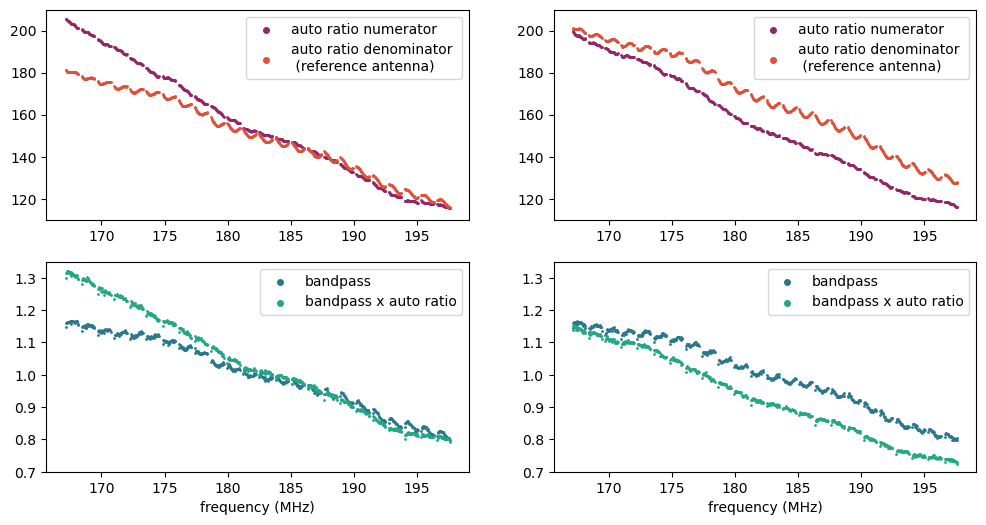

In [137]:
bls_info = obs["obs"]["baseline_info"][0]
freqs = cal.cal.freq[0]
plot_freqs = freqs / 1e6
freq_use = bls_info["freq_use"][0].astype(bool)
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,6))
# for each pol, plot bandpass
for i in range(2):
    ax = axes[0, i]
    ax.scatter(plot_freqs[freq_use], test_sqrt[9, :, i][freq_use], s=1, label="auto ratio numerator", color=my_colors1[2])
    ax.scatter(plot_freqs[freq_use], test_sqrt[1, :, i][freq_use], s=1, label="auto ratio denominator \n (reference antenna)", color=my_colors1[3])
    ax.legend(markerscale=4)
    ax.set_ylim(110, 210)
    ax = axes[1, i]
    ax.scatter(plot_freqs[freq_use], bp[:, i][freq_use], s=1, label="bandpass", color=my_colors2[2])
    ax.scatter(plot_freqs[freq_use], bp[:, i][freq_use] * test_ratio[9, :, i][freq_use], s=1, label="bandpass x auto ratio", color=my_colors2[3])
    ax.legend(markerscale=4)
    ax.set_ylim(.7, 1.35)
    ax.set_xlabel("frequency (MHz)")
fig.savefig("/Users/pstar/EORanalysis/thesis_plots/bandpass.pdf")
plt.show()
plt.close()

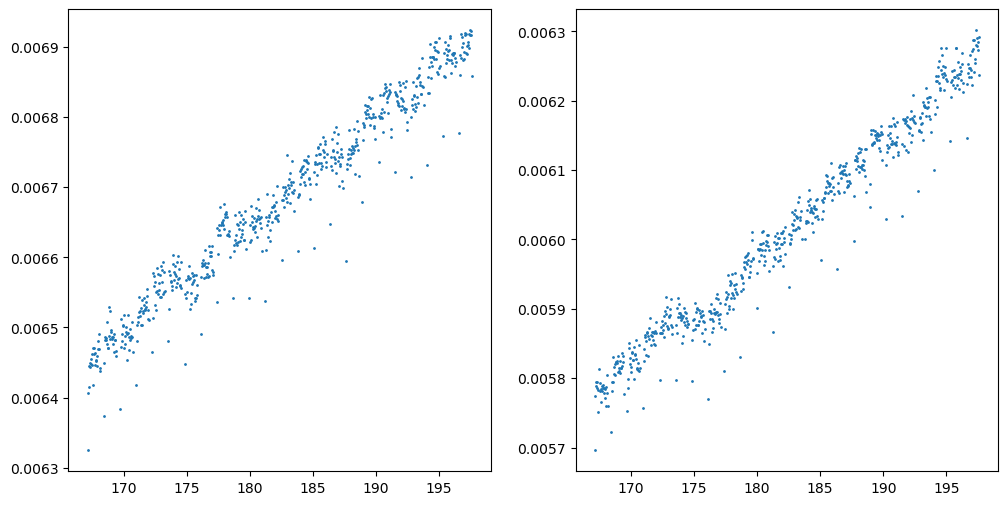

In [123]:
bls_info = obs["obs"]["baseline_info"][0]
freqs = cal.cal.freq[0]
plot_freqs = freqs / 1e6
freq_use = bls_info["freq_use"][0].astype(bool)
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
# for each pol, plot bandpass
for i in range(2):
    ax = axes[i]
    ax.scatter(plot_freqs[freq_use], bp[:, i][freq_use] / auto_sqrt[1, 0, :, i][freq_use], s=1, label="bandpass / ref_antenna")
plt.show()
plt.close()

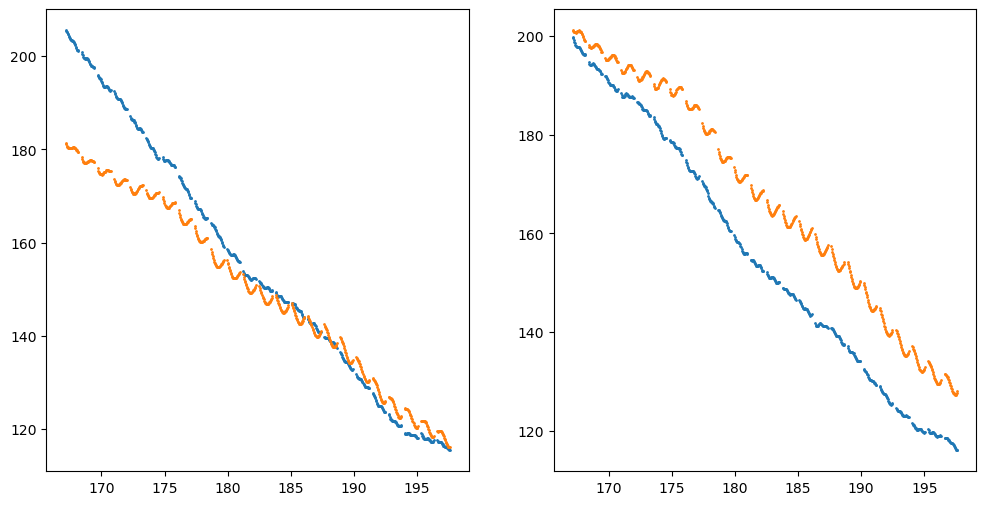

In [43]:
bls_info = obs["obs"]["baseline_info"][0]
freqs = cal.cal.freq[0]
plot_freqs = freqs / 1e6
freq_use = bls_info["freq_use"][0].astype(bool)
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
# for each pol, plot bandpass
for i in range(2):
    ax = axes[i]
    ax.scatter(plot_freqs[freq_use], auto_sqrt[9, 0, :, i][freq_use], s=1, label="auto ratio top")
    ax.scatter(plot_freqs[freq_use], auto_sqrt[1, 0, :, i][freq_use], s=1, label="auto ratio bottom")
plt.show()
plt.close()

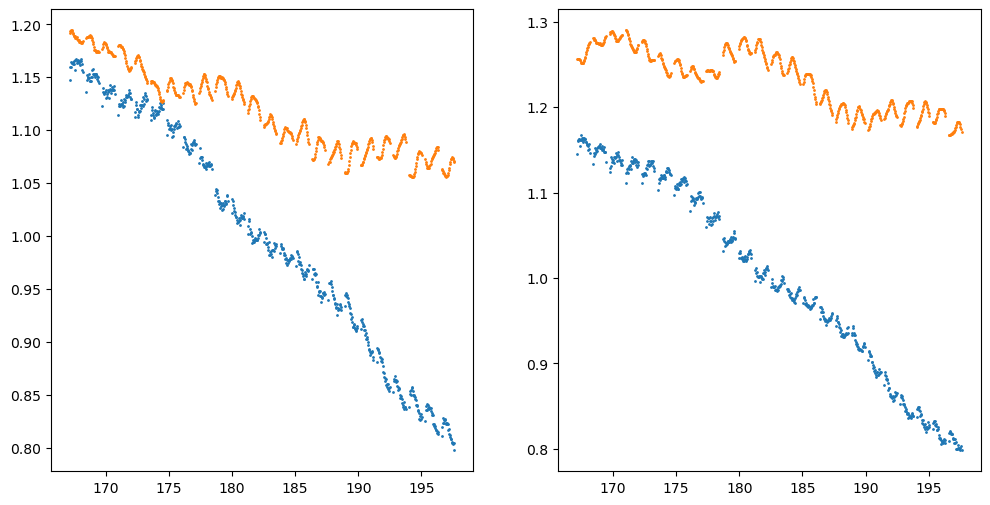

In [44]:
bls_info = obs["obs"]["baseline_info"][0]
freqs = cal.cal.freq[0]
plot_freqs = freqs / 1e6
freq_use = bls_info["freq_use"][0].astype(bool)
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
# for each pol, plot bandpass
for i in range(2):
    ax = axes[i]
    ax.scatter(plot_freqs[freq_use], bp[:, i][freq_use], s=1, label="bandpass")
    ax.scatter(plot_freqs[freq_use], auto_ratio[10, 0, :, i][freq_use], s=1, label="ref_antenna time-averaged square root auto")
plt.show()
plt.close()

In [135]:
# plot various calibration terms
# what are gain units?
def cal_breakdown_plot(cal, obs, uv, bp, ant_ind, pol_ind, plot_title=True):
    # uv is expected to be an object with time averaged autos
    if uv.Ntimes > 1:
        print('uv object must be averaged in time')
        return
    if not uv.future_array_shapes:
        uv.use_future_array_shapes()
    
    bls_info = obs["obs"]["baseline_info"][0]
    
    ref_antenna = int(cal.cal.ref_antenna_name[0])
    ref_antenna_ind = np.where(uv.ant_1_array == ref_antenna)[0]
    
    freqs = cal.cal.freq[0]
    plot_freqs = freqs / 1e6
    freq_use = bls_info["freq_use"][0].astype(bool)
    
    fit_gain = cal.cal.gain[0][pol_ind][ant_ind]
    
    fig, axes = plt.subplots(nrows=7, figsize=(12,16))
    # first row: raw cal amplitude
    raw = fit_gain + cal.cal.gain_residual[0][pol_ind][ant_ind]

    ax = axes[0]
    ax.scatter(plot_freqs[freq_use], np.abs(raw[freq_use]), s=1, label="raw gain amplitude", color = my_colors1[1])
    ax.legend(markerscale=4, loc="lower left")
    ax.set_ylabel("gain amplitude", fontsize=12)
    ax.set_ylim(.5, 1.8)
    
    # second row: auto ratio top and bottom; global bandpass
    # need to get files for all of these
    # plot auto ratio top term
    # plot auto ratio bottom term
    # plot global bandpass
    ax = axes[1]
    ax.set_ylabel("amplitude (units vary)", fontsize=12)
    bp_use = bp[:, pol_ind]
    auto_sqrt = np.sqrt(np.abs(uv.data_array))
    auto_ratio = auto_sqrt / auto_sqrt[1, ...]
    ratio_use = auto_ratio[ant_ind, :, pol_ind]
    test_ratio_use = test_ratio[ant_ind, :, pol_ind]
    amp_params = cal.cal.amp_params[0][ant_ind, pol_ind][:,0]
    poly_amp = polyval(np.arange(768), amp_params)
    ax.scatter(plot_freqs[freq_use], test_ratio_use[freq_use], s=1, label="auto ratio", color = my_colors1[2])
    ax.scatter(plot_freqs[freq_use], bp_use[freq_use], s=1, label="global bandpass", color = my_colors1[3])
    ax.scatter(plot_freqs[freq_use], poly_amp[freq_use], s=1, label="ampltude polynomial fit", color = my_colors1[4])
    ax.legend(markerscale=4, loc="lower left")
    ax.set_ylim(.7, 1.5)
    
    # fourth row: final gain amplitude
    ax = axes[2]
    gain_amp = poly_amp * bp_use * ratio_use
    # ax.scatter(plot_freqs[freq_use], np.abs(fit_gain[freq_use]), s=1, label="final gain amplitude")
    ax.scatter(plot_freqs[freq_use], np.abs(fit_gain[freq_use]), s=1, label="final gain amplitude", color = my_colors1[1])
    ax.legend(markerscale=4, loc="lower left")
    ax.set_ylabel("gain amplitude", fontsize=12)
    ax.set_ylim(.5, 1.8)

    # initial phase solution
    ax = axes[3]
    ax.scatter(plot_freqs[freq_use], np.angle(raw[freq_use]), s=1, label="raw gain phase", color = my_colors2[1])
    ax.legend(markerscale=4, loc="lower left")
    ax.set_ylabel("phase (radians)", fontsize=12)
    ax.set_ylim(-np.pi, np.pi)
    # fifth row: phase polyfit and cable reflection fit
    phase_params = cal.cal.phase_params[0][ant_ind, pol_ind][:,0]
    poly_phase = polyval(np.arange(768), phase_params)
    cable_params = cal.cal.mode_params[0][ant_ind, pol_ind]
    # cable_params == [mode, amp, phase]
    cable_phase_fit = - (2 * np.pi * cable_params[0] * np.arange(768) / 768) + cable_params[2]
    full_cable = cable_params[1] * np.exp(1j * cable_phase_fit)
    ax.set_ylim(-np.pi, np.pi)
    cable_phase = np.imag(full_cable)
    ax = axes[4]
    # ax.scatter(plot_freqs[freq_use], np.angle(fit_gain[freq_use]), s=1)
    ax.scatter(plot_freqs[freq_use], poly_phase[freq_use], s=1, label="phase polynomial fit", color = my_colors2[2])
    ax.scatter(plot_freqs[freq_use], cable_phase[freq_use], s=1, label="phase cable reflection fit", color = my_colors2[3])
    ax.legend(markerscale=4, loc="lower left")
    ax.set_ylabel("phase (radians)", fontsize=12)
    # print(np.angle(fit_gain)[5:8])
    # print(poly_phase[755:758])
    # print(cable_phase[5:8])
    # print(poly_phase[5:8] + cable_phase[5:8])
    # sixth row: final cal solution
    ax = axes[5]
    ax.scatter(plot_freqs[freq_use], np.angle(fit_gain[freq_use]), s=1, label="final gain phase", color = my_colors2[1])
    ax.legend(markerscale=4, loc="lower left")
    ax.set_ylabel("phase (radians)", fontsize=12)
    ax.set_xlabel("Frequency (MHz)", fontsize=14)
    ax.set_ylim(-np.pi, np.pi)
    print(len(str(obs.obs.pol_names[0][pol_ind])))
    ax = axes[6]
    gain_ratio = np.abs(fit_gain/raw)
    ax.scatter(plot_freqs[freq_use], gain_ratio[freq_use], s=1, label="amplitude of (final gain / raw gain)", color = my_colors1[0])
    ax.legend(markerscale=4, loc="lower left")
    ax.set_ylabel("amplitude of gain ratio", fontsize=12)
    ax.set_ylim(.9, 1.1)
    ax.set_xlabel("frequency (MHz)")
    if plot_title:
        fig.suptitle("Tile " + str(obs.obs.meta_data[0].tile[::2][ant_ind]) + " " + str(obs.obs.pol_names[0][pol_ind])[2:-1] + "\n Cable flavor: " + str(obs.obs.meta_data[0].flavors[::2][ant_ind])[2:-1], fontsize=16)
        plt.subplots_adjust(top=.93)
    fig.savefig("/Users/pstar/EORanalysis/thesis_plots/final_gains.pdf")
    plt.show()
    plt.close()

5


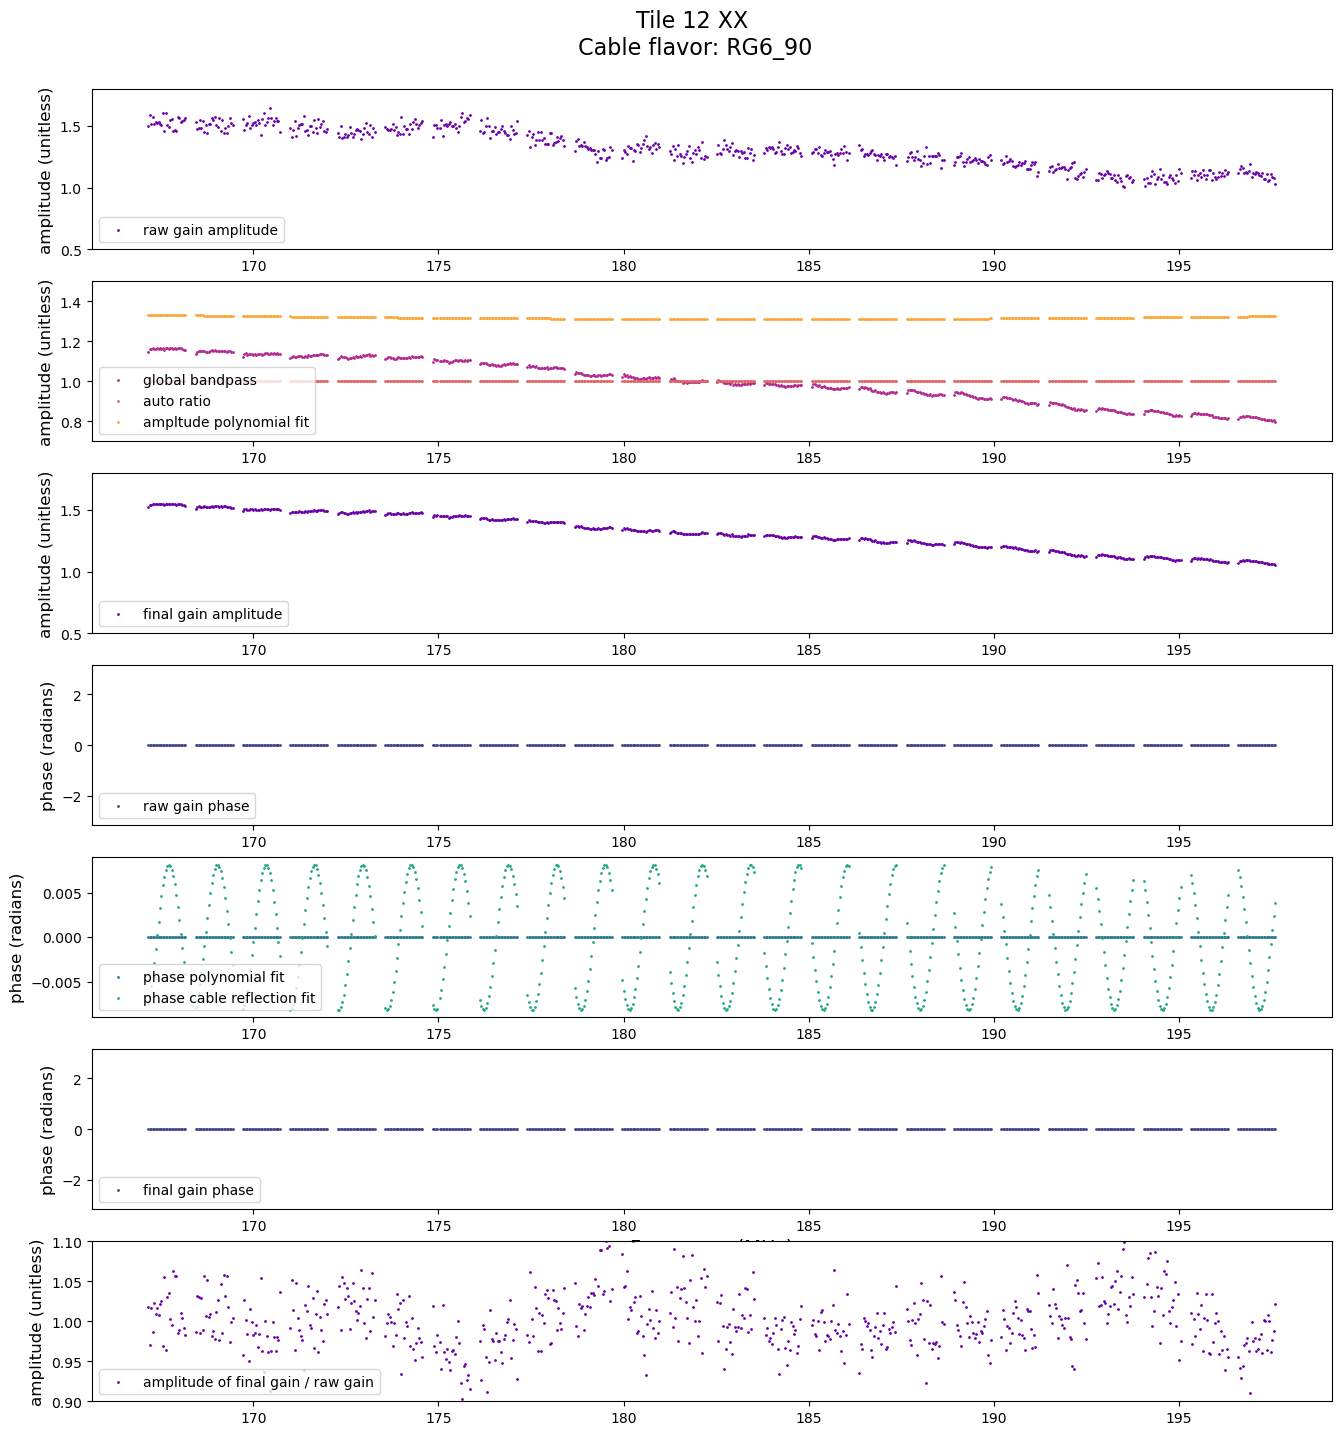

In [65]:
cal_breakdown_plot(cal, obs, uv2, bp, 1, 0)

5


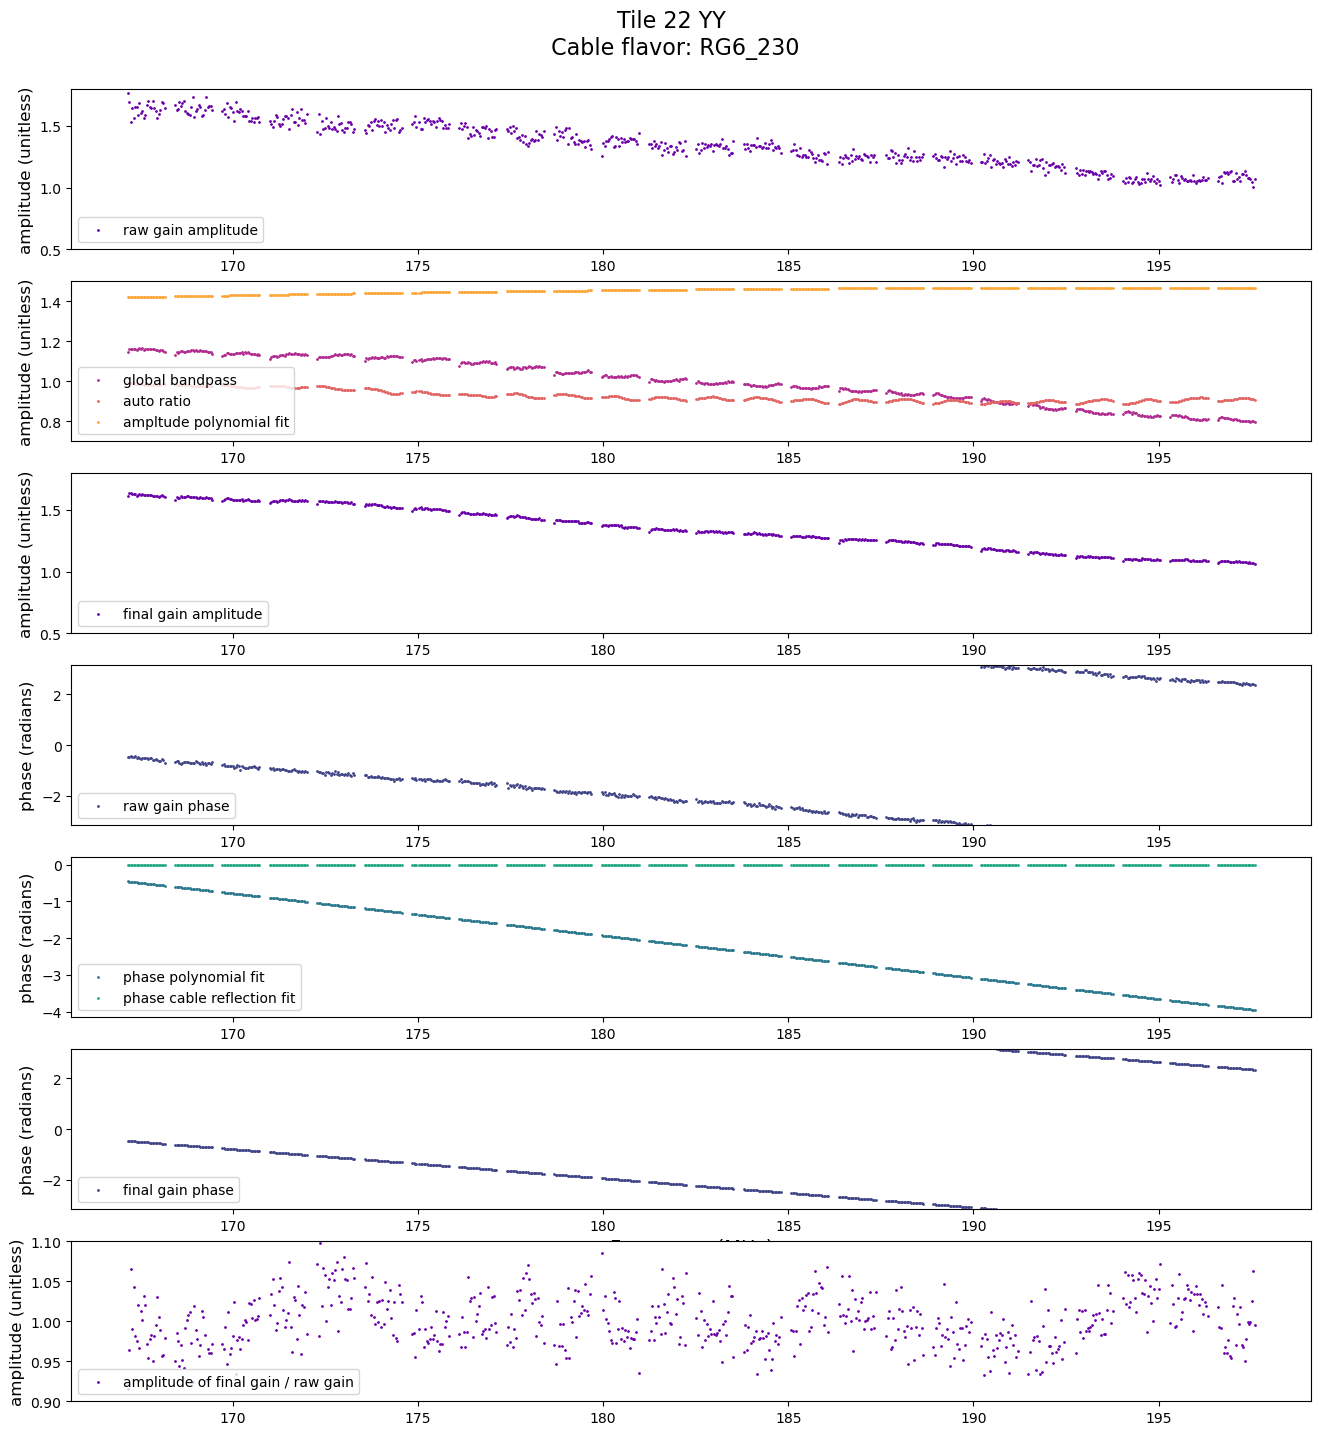

In [66]:
cal_breakdown_plot(cal, obs, uv2, bp, 9, 1)

5


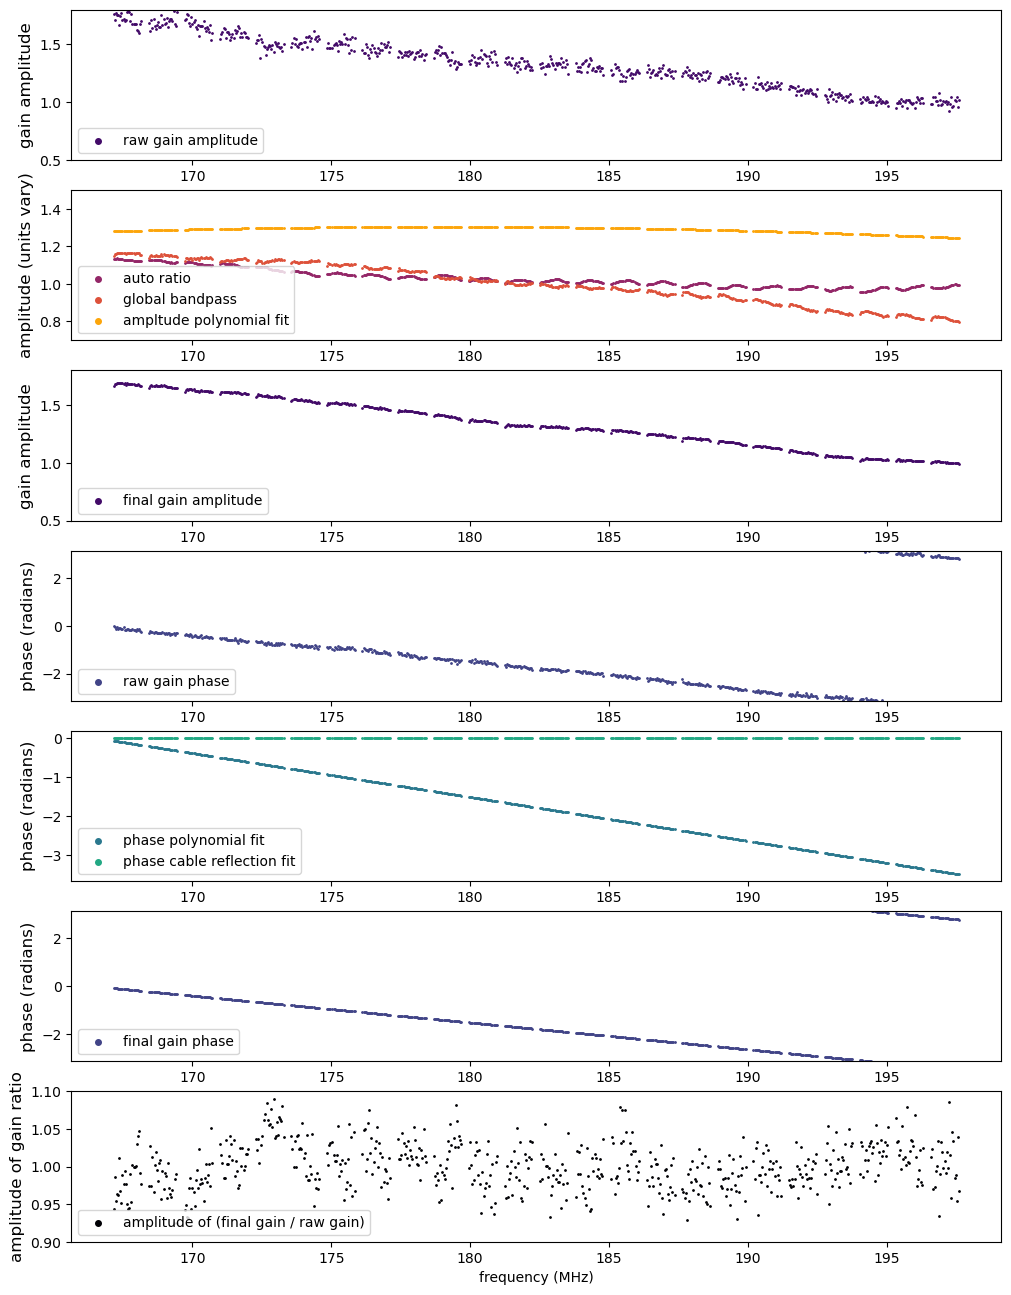

In [136]:
cal_breakdown_plot(cal, obs, uv2, bp, 9, 0, plot_title=False)

In [142]:
obs.obs.meta_data[0].tile[::2]

array([  11,   12,   13,   14,   15,   16,   17,   18,   21,   22,   23,
         24,   25,   26,   27,   28,   31,   32,   33,   34,   35,   36,
         37,   38,   41,   42,   43,   44,   45,   46,   47,   48,   61,
         62,   63,   64,   65,   66,   67,   68,   81,   82,   83,   84,
         85,   86,   87,   88,   91,   92,   93,   94,   95,   96,   97,
         98, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072], dtype='>i2')

In [ ]:
obs.obs.meta_data[0].flavors[::2]

In [ ]:
cal.cal.tile_names

In [ ]:
bls_info = obs["obs"]["baseline_info"][0]

In [ ]:
bls_info.dtype.names

In [ ]:
tile_use = bls_info["tile_use"][0]

In [ ]:
bls_info["tile_names"]

In [ ]:
freq_use = bls_info["freq_use"][0]

In [ ]:
cal.cal.conv_iter[0][0].shape

In [ ]:
print(cal.cal.convergence[0][1].shape)
print(cal.cal.convergence[0][0][:, 89])

In [ ]:
# The amplitude and phase parameters are ordered by the least-degree to the highest-degree;
# a polynomial fit of A + Bx + Cx2 has an array of three values A,B, and C. 

In [ ]:
# check degree of amplitude polyfit
cal.cal['amp_degree']

In [ ]:
# check degree of phase polyfit
cal.cal['phase_degree']

In [ ]:
# look at phase params
print(cal.cal['phase_params'][0].shape)
print(cal.cal['phase_params'][0][32, 0])
print(cal.cal['phase_params'][0][32, 1])

In [ ]:
# look at amp params
print(cal.cal['amp_params'][0].shape)
print(cal.cal['amp_params'][0][32, 0])
print(cal.cal['amp_params'][0][32, 1])

In [ ]:
# look at averages
np.mean(cal.cal['amp_params'][0][tile_use == 1], axis=0)

In [ ]:
# look at distribution for a single obs
cal.cal['amp_params'][0][tile_use == 1][:, 0].shape

In [ ]:
test = np.hstack(cal.cal['amp_params'][0][tile_use == 1][:, 1])

In [ ]:
test.shape

In [ ]:
test[:, 0]

In [ ]:
cal.cal['amp_params'][0][tile_use == 1][:, 0][0]

In [ ]:
degree = 3
npols = 2
pols = ['xx', 'yy']
fig, axes = plt.subplots(ncols=degree, nrows=npols, figsize=(12,5))
for j in range(npols):
    pol_data = np.hstack(cal.cal['amp_params'][0][tile_use == 1][:, j])
    for i in range(degree):
        ax = axes[j, i]
        ax.hist(pol_data[i, :], bins=100)
        if j==0:
            ax.set_title("order: " + str(i))
        if i == 0:
            ax.set_ylabel(pols[j])
        ax.set_ylim(0, 8.5)
        lim = np.max(np.abs(pol_data[i, :]))
        lim += lim/10
        ax.set_xlim(-lim, lim)
plt.show()
plt.close()

In [ ]:
degree = 2
npols = 2
pols = ['xx', 'yy']
fig, axes = plt.subplots(ncols=degree, nrows=npols, figsize=(4*degree,4*npols))
for j in range(npols):
    pol_data = np.hstack(cal.cal['phase_params'][0][tile_use == 1][:, j])
    for i in range(degree):
        ax = axes[j, i]
        ax.hist(pol_data[i, :], bins=100)
        if j==0:
            ax.set_title("order: " + str(i))
        if i == 0:
            ax.set_ylabel(pols[j])
        ax.set_ylim(0, 12)
        lim = np.max(np.abs(pol_data[i, :]))
        lim += lim/10
        ax.set_xlim(-lim, lim)
plt.suptitle("phase fit params")
plt.show()
plt.close()

In [ ]:
# look at cal convergence
conv_thresh = cal.cal.conv_thresh[0]
print(conv_thresh)

In [ ]:
# taken from uvcal
conv_qa = np.zeros((128, 768, 2), dtype=np.float64)
for jones_i, arr in enumerate(cal.cal.convergence[0]):
    conv_qa[:, :, jones_i] = arr

In [ ]:
qa_mask = np.full((128, 768, 2), True)
qa_mask[tile_use == 0] = False
qa_mask[:, freq_use == 0, :] = False

In [ ]:
qa_mask[13, :, 0]

In [ ]:
# conv_qa_masked = np.ma.array(conv_qa, mask=qa_mask)

In [ ]:
# make a mask such that values under the convergence threshhold are True
conv_mask = conv_qa < conv_thresh
# then I want a mask such that unflagged values and values under the convergence threshold are false
mask_use = np.logical_or(conv_mask, ~qa_mask)

In [ ]:
cal.cal.freq[0][0]

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(16,8))
cb_lines = cal.cal.freq[0][::32] /1e6
for i in range(2):
    ax = axes[i]
    # only plot values for which mask is False
    conv_qa_masked = np.ma.masked_where(~qa_mask[:, :, i], conv_qa[:, :, i])
    print(np.min(conv_qa_masked))
    print(np.max(conv_qa_masked))
    im = ax.imshow(conv_qa_masked-conv_thresh, aspect='auto', interpolation=None, extent=[cal.cal.freq[0][0] / 1e6, cal.cal.freq[0][-1] / 1e6, 128, 0], norm = LogNorm(vmin=4e-11, vmax=1.12))
    if i == 0:
        ax.set_ylabel("antenna index")
    # ax.vlines(cb_lines, linestyle='--', color='grey', alpha=0.5, ymin=0, ymax=128)
    ax.set_xlabel("frequency (MHz)")
    ax.set_title(pols[i])
    fig.colorbar(im, ax=ax)
# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(im, cax=cbar_ax)

plt.show()
plt.close()

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(16,8))
for i in range(2):
    ax = axes[i]
    # only plot values for which mask is False
    im = ax.imshow(qa_mask[:, :, i], aspect='auto', interpolation=None, extent=[cal.cal.freq[0][0] / 1e6, cal.cal.freq[0][-1] / 1e6, 128, 0])
    if i == 0:
        ax.set_ylabel("antenna index")
    ax.set_xlabel("frequency (MHz)")
    ax.set_title(pols[i])
    # fig.colorbar(im, ax=ax)
# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(im, cax=cbar_ax)

plt.show()
plt.close()

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(16,8))
for i in range(2):
    ax = axes[i]
    # only plot values for which mask is False
    im = ax.imshow(mask_use[:, :, i], aspect='auto', interpolation=None, extent=[cal.cal.freq[0][0] / 1e6, cal.cal.freq[0][-1] / 1e6, 128, 0])
    if i == 0:
        ax.set_ylabel("antenna index")
    ax.set_xlabel("frequency (MHz)")
    ax.set_title(pols[i])
    # fig.colorbar(im, ax=ax)
# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(im, cax=cbar_ax)

plt.show()
plt.close()

In [ ]:
np.where(conv_qa > conv_thresh)

In [ ]:
cal.cal.freq[0][~mask_use[80, :, 0]] / 1e6